In [118]:
%matplotlib inline
import skbio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [119]:
#Using the full American Gut mapping file, we reduced it to only samples that were fecal. 
#The mapping file was then filtered to remove samples which did not have sufficient data 
#(after bloom removal). Following this, host subject IDs representing only a single sample 
#were removed. The time deltas were then generated by iterating over each host subject ID, 
#and computing the time difference in days between all samples associated with that host 
#subject ID.

dm = skbio.DistanceMatrix.read('ag-cleaned-multiple-timepoints_even1250_unweighted.txt')
w_dm = skbio.DistanceMatrix.read('ag-cleaned-multiple-timepoints_even1250_weighted.txt')
deltas = pd.read_csv('ag-cleaned-multiple-timepoints-deltas.txt', sep='\t', dtype=str)

In [120]:
absdeltas = deltas

In [121]:
deltas['DeltaInDays'] = pd.to_numeric(deltas['DeltaInDays'])
absdeltas['DeltaInDays'] = deltas['DeltaInDays'].abs()

In [122]:
unique_ids = pd.unique(deltas['HOST_SUBJECT_ID'])
unique_sampleA = pd.unique(deltas['SampleID-A'])
unique_sampleB = pd.unique(deltas['SampleID-B'])

print(len(unique_ids))
print(len(unique_sampleA))
print(len(unique_sampleB))

565
1553
1553


In [123]:
distance = []
for dl in range(len(absdeltas)):
    distance.append(dm[absdeltas['SampleID-A'][dl], absdeltas['SampleID-B'][dl]])

absdeltas['Distance'] = distance

In [124]:
#What I'm doing here is creating a list delmonths and iterating 
#over absdeltas['DeltasInDays'] to convert the number of days into 
#the closest number of months

delmonths = []
for dl in range(len(absdeltas)):
    if absdeltas['DeltaInDays'][dl]/30 <= 1:
        delmonths.append(1)
    elif absdeltas['DeltaInDays'][dl]/30 <= 2:
        delmonths.append(2)
    elif absdeltas['DeltaInDays'][dl]/30 <= 3:
        delmonths.append(3)
    elif absdeltas['DeltaInDays'][dl]/30 <= 4:
        delmonths.append(4)
    elif absdeltas['DeltaInDays'][dl]/30 <= 5:
        delmonths.append(5)
    elif absdeltas['DeltaInDays'][dl]/30 <= 6:
        delmonths.append(6)
    elif absdeltas['DeltaInDays'][dl]/30 <= 7:
        delmonths.append(7)
    elif absdeltas['DeltaInDays'][dl]/30 <= 8:
        delmonths.append(8)
    elif absdeltas['DeltaInDays'][dl]/30 <= 9:
        delmonths.append(9)
    elif absdeltas['DeltaInDays'][dl]/30 <= 10:
        delmonths.append(10)
    elif absdeltas['DeltaInDays'][dl]/30 <= 11:
        delmonths.append(11)
    elif absdeltas['DeltaInDays'][dl]/30 <= 12:
        delmonths.append(12)
    elif absdeltas['DeltaInDays'][dl]/30 > 12:
        delmonths.append(13)

absdeltas['DeltaInMonths'] = delmonths

In [125]:
uni_sub_del = pd.DataFrame()

In [126]:
#What I try to do here is create a dictionary for each relevant month
#and store the first individual host-subject in a given month in order to
#filter out duplicate host-subjects from getting into uni_sub_del
host_1mo = host_2mo = host_3mo = host_4mo = host_5mo = host_6mo = {}
host_7mo = host_8mo = host_9mo = host_10mo = host_11mo = host_12mo = host_13mo = {}
hosts = [host_1mo, host_2mo, host_3mo, host_4mo, host_5mo, host_6mo, 
        host_7mo, host_8mo, host_9mo, host_10mo, host_11mo, host_12mo, host_13mo]

for month in range(len(hosts)):
    for dl in range(len(absdeltas)):
        if absdeltas['DeltaInMonths'][dl] == month:
            if (absdeltas['HOST_SUBJECT_ID'][dl] not in hosts[month]):
                hosts[month].update({absdeltas['HOST_SUBJECT_ID'][dl]:absdeltas['HOST_SUBJECT_ID'][dl]})
                uni_sub_del = uni_sub_del.append(absdeltas.loc[dl], ignore_index=True)

In [127]:
host_8mo

{'061f06c51ee015c2669699e624b5388549c7a68b9183c5d75ef1ee694bc39c1a6c66f27b4fca9c8b2ce9a70cdd3c320b4c02bf893da3dbf08478e3b80fc0f433': '061f06c51ee015c2669699e624b5388549c7a68b9183c5d75ef1ee694bc39c1a6c66f27b4fca9c8b2ce9a70cdd3c320b4c02bf893da3dbf08478e3b80fc0f433',
 '06ed453796d5f66ee8db5ee1ed966c5a0d3f48014150f7428f24215b9f3ed1793a329df28deb6bda7ac304d2460d08ce55bc4ef94a3d22c534e085dfe679e66f': '06ed453796d5f66ee8db5ee1ed966c5a0d3f48014150f7428f24215b9f3ed1793a329df28deb6bda7ac304d2460d08ce55bc4ef94a3d22c534e085dfe679e66f',
 '09f52fb0b25d97cccfc6b26d291223db0f3059c968282501d3cb6f3f163628b76e95f9a92966b7de732cf7bc5c75d5c5a827bacb04c920e0de5c7a90bc853555': '09f52fb0b25d97cccfc6b26d291223db0f3059c968282501d3cb6f3f163628b76e95f9a92966b7de732cf7bc5c75d5c5a827bacb04c920e0de5c7a90bc853555',
 '0be971ff5d7408f4b23af99ee636ece58f400e758cebae2e624b3dc3aa9c64f498dea0af020ca2c7f4d2e9684a9a16b65817b2d5b90376d11ac2fdd2c0d96d4c': '0be971ff5d7408f4b23af99ee636ece58f400e758cebae2e624b3dc3aa9c64f498dea0a

In [128]:
between_dm = dm

In [129]:
for ser in range(len(absdeltas)):
    ind1 = absdeltas['SampleID-A'][ser]
    ind2 = absdeltas['SampleID-B'][ser]
    bind1 = between_dm.index(ind1)
    bind2 = between_dm.index(ind2)
    between_dm[bind1][bind2] = 0

In [130]:
w_between_dm = w_dm
for ser in range(len(absdeltas)):
    ind1 = absdeltas['SampleID-A'][ser]
    ind2 = absdeltas['SampleID-B'][ser]
    bind1 = w_between_dm.index(ind1)
    bind2 = w_between_dm.index(ind2)
    w_between_dm[bind1][bind2] = 0
    
w_between_cform = w_between_dm.condensed_form()
w_zero_indexes = []
for i in range(len(w_between_cform)):
    if w_between_cform[i] == 0:
        w_zero_indexes.append(i)

w_between_arr = np.delete(w_between_cform, w_zero_indexes)

In [131]:
between_cform = between_dm.condensed_form()

In [132]:
zero_indexes = []
for i in range(len(between_cform)):
    if between_cform[i] == 0:
        zero_indexes.append(i)

In [133]:
between_arr = np.delete(between_cform, zero_indexes)

In [134]:
w_dm = skbio.DistanceMatrix.read('ag-cleaned-multiple-timepoints_even1250_weighted.txt')

In [135]:
w_distance = []
for dl in range(len(absdeltas)):
    w_distance.append(w_dm[absdeltas['SampleID-A'][dl], absdeltas['SampleID-B'][dl]])

absdeltas['Weighted Distance'] = w_distance

In [136]:
w_distance = []
for dl in range(len(uni_sub_del)):
    w_distance.append(w_dm[uni_sub_del['SampleID-A'][dl], uni_sub_del['SampleID-B'][dl]])

uni_sub_del['Weighted Distance'] = w_distance

In [137]:
bet_delmonths = []
for i in range(len(between_arr)):
    bet_delmonths.append(14)

In [138]:
w_bet_delmonths = []
for i in range(len(w_between_arr)):
    w_bet_delmonths.append(14)

In [139]:
bet_cols = ['Distance']
between_df = pd.DataFrame(data=between_arr, columns=bet_cols)

In [140]:
between_df["DeltaInMonths"] = bet_delmonths

In [141]:
w_bet_cols = ['Weighted Distance']

w_between_df = pd.DataFrame(data=w_between_arr, columns=w_bet_cols)
w_between_df["DeltaInMonths"] = w_bet_delmonths
tot_between_df = pd.concat([between_df, w_between_df])

In [142]:
with_betweens_absdeltas = absdeltas.append(tot_between_df)

# RESULTS 
Here are the boxplots with the unweighted distances including the between sample distances as month 14, and below those are the boxplots of the weighted samples. As expected, the median for the between sample distances in notably higher than within sample distances. 

## Unweighted Distances for all within sample distances

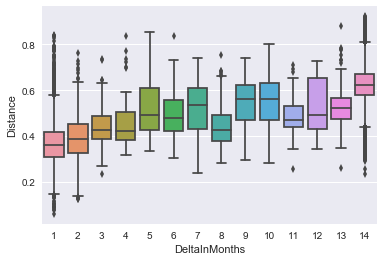

In [143]:
seaborn.boxplot(x="DeltaInMonths", y="Distance", data=with_betweens_absdeltas)

In [144]:
with_betweens_unisubs = uni_sub_del.append(tot_between_df)

## Unweighted Distances for only unique subject distances in each month

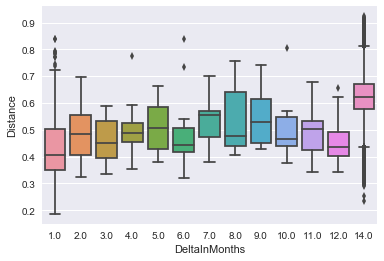

In [145]:
seaborn.boxplot(x="DeltaInMonths", y="Distance", data=with_betweens_unisubs)

## Weighted Distances for all within sample distances

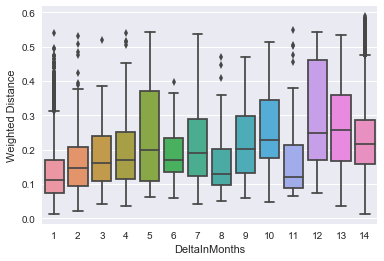

In [146]:
seaborn.boxplot(x="DeltaInMonths", y="Weighted Distance", data=with_betweens_absdeltas)

## Weighted Distances for only unique subject distances in each month

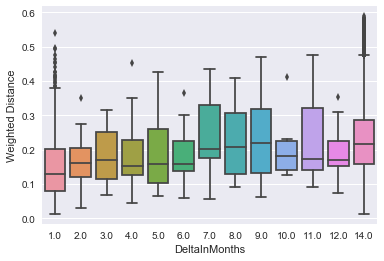

In [147]:
seaborn.boxplot(x="DeltaInMonths", y="Weighted Distance", data=with_betweens_unisubs)